In [1]:
# original code and data: https://www.kaggle.com/bairongmin/transfer-learning-lego-e95dc0-271346

import PIL
from keras.datasets import mnist

from keras.models import Sequential, load_model

from keras.layers import Dense, Dropout, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt
import seaborn as sns

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open(".\\archive\\LEGO brick images v1\\11214 Bush 3M friction with Cross axle\\201706171006-0001.png")
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image

PNG
RGBA
(200, 200)


In [3]:
from os import listdir
import random

list_of_subcategories = listdir('.\\archive\\LEGO brick images v1')
random.sample(list_of_subcategories, 5)

['2357 Brick corner 1x2x2',
 '3005 Brick 1x1',
 '3069 Flat Tile 1x2',
 '18651 Cross Axle 2M with Snap friction',
 '32123 half Bush']

float32
(200, 200, 4)


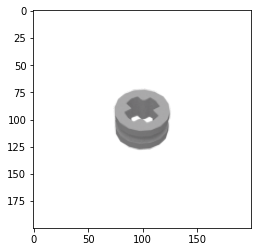

In [4]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('.\\archive\\LEGO brick images v1\\32123 half Bush\\201706171506-0004.png')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [5]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
def loadBatchImages(path):
    catList = listdir(path)
    L = []
    i = 0
    for cat in catList:
        deepPath = path+"/"+cat+"/"
        imageList = listdir(deepPath)
        indx = 0
        for images in imageList:                
            img = load_img(deepPath + images)
            img = img_to_array(img)
            L.append([i,img])
        i += 1
    return L

L = loadBatchImages('.\\archive\\LEGO brick images v1')

In [6]:
import numpy as np
np.array(L).shape

<ipython-input-6-f4a2064cf00d>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(L).shape


(6379, 2)

In [7]:
import pandas as pd
df = pd.DataFrame(L,columns = ['labels','pictures'])
data_sample = df.sample(frac=0.5, random_state=1)
data_train = data_sample.sample(frac=0.8, random_state=1)
data_test = data_sample.drop(data_train.index)
np.array(data_test).shape

(638, 2)

In [8]:
X_train = data_train.drop(['labels'], axis=1)
y_train = data_train['labels']
X_test = data_test.drop(['labels'], axis=1)
y_test = data_test['labels']

In [9]:
y = np.array(list(y_train) + list(y_test))
print(y[0])
y_cat = to_categorical(y)
print(y_cat[0])
#On a seulement 7 classes :
num_classes = y_cat.shape[1]
print(num_classes)

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
16


In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
L = []
for k in X_train:
    L += [k[0]]
L = np.array(L)
X_train = L
X_train.shape

(2552, 200, 200, 3)

In [12]:
P = []
for k in X_test:
    P += [k[0]]
P = np.array(P)
X_test = P
X_test.shape

(638, 200, 200, 3)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
from keras.applications.vgg16 import VGG16

In [18]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(200,200,3))
vgg16.trainable = False

58900480/58889256 [==============================] - 2s 0us/step


In [19]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [20]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [22]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
13/13 [==============================] - 25s 810ms/step - loss: 6684.6356 - accuracy: 0.5362 - val_loss: 56.1532 - val_accuracy: 0.9375
Epoch 2/20
13/13 [==============================] - 3s 203ms/step - loss: 32.4049 - accuracy: 0.6487 - val_loss: 8.7604 - val_accuracy: 0.0831
Epoch 3/20
13/13 [==============================] - 3s 205ms/step - loss: 9.0797 - accuracy: 0.3358 - val_loss: 2.2776 - val_accuracy: 0.8881
Epoch 4/20
13/13 [==============================] - 3s 223ms/step - loss: 2.6789 - accuracy: 0.7326 - val_loss: 1.6862 - val_accuracy: 0.2723
Epoch 5/20
13/13 [==============================] - 3s 198ms/step - loss: 1.1860 - accuracy: 0.5464 - val_loss: 0.5446 - val_accuracy: 0.8305
Epoch 6/20
13/13 [==============================] - 3s 212ms/step - loss: 0.5364 - accuracy: 0.7074 - val_loss: 0.4887 - val_accuracy: 0.8580
Epoch 7/20
13/13 [==============================] - 3s 202ms/step - loss: 0.3924 - accuracy: 0.8021 - val_loss: 0.3299 - val_accuracy: 0.7784


In [23]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 81.41%


In [24]:
for i in range (len(vgg16.layers)):
    print (i,vgg16.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x000001A2322AE670>
1 <keras.layers.convolutional.Conv2D object at 0x000001A23264CDC0>
2 <keras.layers.convolutional.Conv2D object at 0x000001A23268F400>
3 <keras.layers.pooling.MaxPooling2D object at 0x000001A2328367F0>
4 <keras.layers.convolutional.Conv2D object at 0x000001A232845580>
5 <keras.layers.convolutional.Conv2D object at 0x000001A23283E3A0>
6 <keras.layers.pooling.MaxPooling2D object at 0x000001A23282CA90>
7 <keras.layers.convolutional.Conv2D object at 0x000001A23282CD60>
8 <keras.layers.convolutional.Conv2D object at 0x000001A23283EB50>
9 <keras.layers.convolutional.Conv2D object at 0x000001A23284D430>
10 <keras.layers.pooling.MaxPooling2D object at 0x000001A23285FD00>
11 <keras.layers.convolutional.Conv2D object at 0x000001A232855DC0>
12 <keras.layers.convolutional.Conv2D object at 0x000001A23287B760>
13 <keras.layers.convolutional.Conv2D object at 0x000001A23287B3A0>
14 <keras.layers.pooling.MaxPooling2D object at 0x000001

In [25]:
for layer in vgg16.layers[15:]:
    layer.trainable=True
for layer in vgg16.layers[0:15]:
    layer.trainable=False

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
13/13 [==============================] - 4s 246ms/step - loss: 433.7713 - accuracy: 0.6359 - val_loss: 8.1919 - val_accuracy: 0.7290
Epoch 2/20
13/13 [==============================] - 3s 196ms/step - loss: 42.3014 - accuracy: 0.4004 - val_loss: 19.9595 - val_accuracy: 0.0872
Epoch 3/20
13/13 [==============================] - 3s 201ms/step - loss: 10.6095 - accuracy: 0.4700 - val_loss: 1.6719 - val_accuracy: 0.8045
Epoch 4/20
13/13 [==============================] - 3s 203ms/step - loss: 2.0643 - accuracy: 0.7645 - val_loss: 1.1189 - val_accuracy: 0.7592
Epoch 5/20
13/13 [==============================] - 3s 200ms/step - loss: 0.9678 - accuracy: 0.6603 - val_loss: 0.5494 - val_accuracy: 0.5974
Epoch 6/20
13/13 [==============================] - 3s 196ms/step - loss: 0.4467 - accuracy: 0.7454 - val_loss: 0.3463 - val_accuracy: 0.7866
Epoch 7/20
13/13 [==============================] - 3s 197ms/step - loss: 0.2987 - accuracy: 0.7796 - val_loss: 0.2943 - val_accuracy: 0.7674
E

In [27]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 87.99%


In [28]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

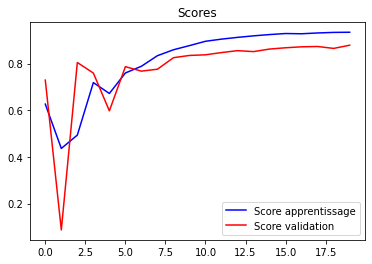

In [29]:
plot_scores(train)